<a href="https://colab.research.google.com/github/pear2jam/notebooks/blob/main/Houses_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install catboost
!pip install xgboost

     |████████████████████████████████| 76.1 MB 1.2 MB/s 


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data_url = 'drive/MyDrive/Datasets/house_prices/'
train = pd.read_csv(data_url + "train.csv")
test = pd.read_csv(data_url + "test.csv")

In [5]:
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
target_train = train["SalePrice"]
train = train.drop(["Id", "SalePrice"], axis=1)
test = test.drop("Id", axis=1)

In [8]:
data0 = pd.concat([train, test])
data0 = data0.reset_index(drop=True)

In [9]:
data0.isna().sum()

MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinSF1          1
BsmtFinType2       80
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [10]:
data_num = data0.select_dtypes(np.number)
num_columns = data_num.loc[:, data_num.isna().sum() > 0].columns
num_columns

Index(['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
       'GarageCars', 'GarageArea'],
      dtype='object')

In [11]:
data1 = data0.copy()

<h3> Knn imputations

In [12]:
def knn_impute(X, column):
  from sklearn.neighbors import KNeighborsRegressor
  reg = KNeighborsRegressor()

  
  X_num_temp = X.select_dtypes(np.number)
  X_num = X_num_temp.loc[:, X_num_temp.isna().sum() == 0]
  
  ind_fit = np.where(X[column].isna() == False)[0]
  ind_impute = np.where(X[column].isna())[0]
  reg.fit(X_num.iloc[ind_fit], X[column].iloc[ind_fit])

  pred = reg.predict(X_num.iloc[ind_impute])

  X.loc[X[column].isna() == True, column] = pred
  return X

In [13]:
for column in sorted([              
  'LotFrontage',
  'MasVnrArea',
  'BsmtFinSF1',
  'BsmtFinSF2',
  'BsmtUnfSF',
  'TotalBsmtSF',
  'BsmtFullBath',
  'BsmtHalfBath',
  'GarageYrBlt',
  'GarageCars',
  'GarageArea',
],key = (lambda x: data1[x].isna().sum())):
  data1 = knn_impute(data1, column)

In [14]:
data1.isna().sum()

MSSubClass          0
MSZoning            4
LotFrontage         0
LotArea             0
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
MasVnrArea          0
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinSF1          0
BsmtFinType2       80
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [15]:
for column in data1.select_dtypes("object").columns:
  data1[column] = data1[column].fillna(data1[column].mode(dropna=True)[0])

In [16]:
data1.isna().sum().sum()

0

In [17]:
object_columns = data1.select_dtypes("object").columns
data2 = pd.get_dummies(data1)

<h3>Feature transformations

In [18]:
for column in num_columns:
  if np.abs(data2[column].skew()) > 0.5:
    data2[column] = data2[column].apply(np.sqrt)

In [19]:
data2[num_columns].skew()

LotFrontage    -0.007240
MasVnrArea      1.043642
BsmtFinSF1     -0.011478
BsmtFinSF2      2.983072
BsmtUnfSF      -0.238478
TotalBsmtSF    -1.309181
BsmtFullBath    0.382151
BsmtHalfBath    3.740844
GarageYrBlt    -0.319727
GarageCars     -0.218896
GarageArea      0.240994
dtype: float64

In [20]:
from sklearn.preprocessing import StandardScaler
data2 = pd.DataFrame(StandardScaler().fit_transform(data2), index=data2.index, columns=data2.columns)

[]

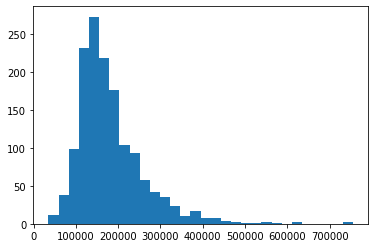

In [21]:
plt.hist(target_train, bins=30)
plt.plot()

In [22]:
target_train = np.log(target_train)

[]

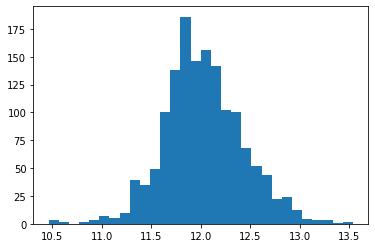

In [23]:
plt.hist(target_train, bins=30)
plt.plot()

<h3>Splitting, comparing models and prediction

In [24]:
data_train = data2.loc[0:target_train.shape[0]-1, :]
data_test = data2.loc[target_train.shape[0]:,]

In [ ]:
from sklearn.model_selection import cross_val_score
from catboost import CatBoostRegressor

best = -1000
best_model = []
rmse = 'neg_root_mean_squared_error'
for iters in [4000, 5000, 6000]:
    model = CatBoostRegressor(iterations=iters, eval_metric='RMSE',
                                depth=6, silent=True).fit(data_train, target_train)
    score = np.mean(cross_val_score(model, data_train, target_train, cv=5, scoring=rmse))
    if score > best:
      best = score
      best_model = model
      print(">New best")
    print("depth:", iters)
    print("score:", score)
    print("------------------")

>New best
depth: 4000
score: -0.11723194230449578
------------------
>New best
depth: 5000
score: -0.11696503426223526
------------------
depth: 6000
score: -0.11758706430684282
------------------


In [ ]:
pred = np.exp(best_model.predict(data_test))

In [ ]:
max(pred)

528869.1814923581

<h4>Bagging

In [52]:
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score

In [ ]:
cb_model = CatBoostRegressor(iterations=5000, eval_metric='RMSE', depth=5, silent=True)
cb_model.fit(data_train, target_train)

In [59]:
xgb_model = XGBRegressor()

best_score_xg = -1000
for max_depth in [4, 5, 6, 7, 8]:
  for n_est in [100, 400, 700, 1000, 1500]:
    for subsample in [0.5, 0.7, 1]:
      xgb_model_try = XGBRegressor(objective ='reg:squarederror', n_estimators=n_est,
                                   subsample=subsample, max_depth=max_depth, eval_metric='rmse')
      rmse = 'neg_root_mean_squared_error'
      score = np.mean(cross_val_score(xgb_model_try, data_train, target_train, cv=5, scoring=rmse))
      if score > best_score_xg:
        best_score_xg = score
        xgb_model = xgb_model_try
        print("New best", score)

New best -0.12836473129816764
New best -0.12811537923652766
New best -0.1254772950557464
New best -0.12513663078746265


KeyboardInterrupt: ignored

In [55]:
elastic_model = ElasticNet()
best_score_elastic = -1000
for alpha in [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95]:
  for l1_ratio in [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95]:
    for max_iter in [700, 1000, 2500]:
      elastic_model_try = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, max_iter=max_iter)
      rmse = 'neg_root_mean_squared_error'
      score = np.mean(cross_val_score(elastic_model_try, data_train, target_train, cv=5, scoring=rmse))
      if score > best_score_elastic:
        best_score_elastic = score
        elastic_model = elastic_model_try
        print("New best", score)
      
elastic_model.fit(data_train, target_train)

New best -0.13415636983736037
New best -0.13376387232489134
New best -0.13299740780574318


ElasticNet(alpha=0.1, l1_ratio=0.05, max_iter=700)

In [61]:
cb_model.fit(data_train, target_train)
xgb_model.fit(data_train, target_train)
elastic_model.fit(data_train, target_train)

ElasticNet(alpha=0.1, l1_ratio=0.05, max_iter=700)

In [62]:
cb_pred = np.exp(cb_model.predict(data_test))
xgb_pred = np.exp(xgb_model.predict(data_test))
elastic_pred = np.exp(elastic_model.predict(data_test))

In [71]:
pred = 0.8*cb_pred + 0.2*xgb_pred + 0.0*elastic_pred

In [72]:
max(pred)

533694.2748813864

In [73]:
submission = pd.concat([pd.Series(range(1461, 2920), name="Id"), pd.Series(pred, name='SalePrice')], axis=1)
submission.to_csv('drive/MyDrive/submission.csv', index=False, header=True)

(array([ 79., 462., 448., 224., 119.,  56.,  33.,  21.,  13.,   4.]),
 array([ 43067.16829432,  92129.87895303, 141192.58961174, 190255.30027044,
        239318.01092915, 288380.72158786, 337443.43224656, 386506.14290527,
        435568.85356397, 484631.56422268, 533694.27488139]),
 <a list of 10 Patch objects>)

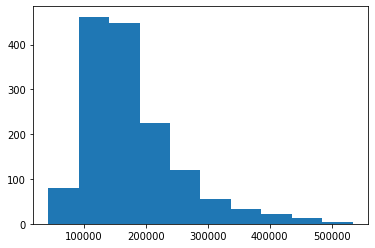

In [74]:
plt.hist(pred)